<a href="https://www.kaggle.com/code/mh0386/autoencoder?scriptVersionId=244729590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from matplotlib import pyplot
from numpy import float32, random, array, prod, arange, clip, ndarray
from tensorflow.keras import layers, Model, backend
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

2025-06-10 15:56:05.183945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749570965.392824      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749570965.462236      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = cifar10.load_data()
(x_train, _), (x_test, _) = data
x_train = array(x_train)
x_test = array(x_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

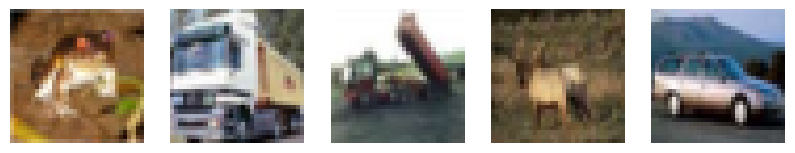

In [4]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    pyplot.subplot(1, 5, i)
    pyplot.imshow(image)
    pyplot.axis("off")
    i += 1
pyplot.show()

In [5]:
x_train = x_train.astype(float32) / 255.0
x_test = x_test.astype(float32) / 255.0

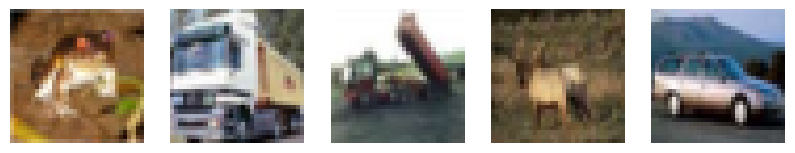

In [6]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    pyplot.subplot(1, 5, i)
    pyplot.imshow(image)
    pyplot.axis("off")
    i += 1
pyplot.show()

In [7]:
x_train_flattened = x_train.reshape((len(x_train), prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), prod(x_test.shape[1:])))

In [8]:
x_train_flattened.shape, x_test_flattened.shape

((50000, 3072), (10000, 3072))

In [9]:
encoding_dim = 100  # This is the size of our encoded representations

## Create Autoencoder Model

In [10]:
input_img = Input(shape=(3072,))

# Encoder
x = layers.Dense(1000, activation="relu")(input_img)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
encoded = layers.Dense(encoding_dim, activation="relu")(x)  # Define encoding dimension

# Decoder
x = layers.Dense(200, activation="relu")(encoded)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
decoded = layers.Dense(3072, activation="sigmoid")(x)  # Match output dimension to input

autoencoder = Model(input_img, decoded)

I0000 00:00:1749570989.549523      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
autoencoder.compile(loss="mse", optimizer="adam")

In [12]:
h = autoencoder.fit(x_train_flattened, x_train_flattened, epochs=100, batch_size=64)

Epoch 1/100


I0000 00:00:1749570998.053561      57 service.cc:148] XLA service 0x783e0800dd50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749570998.054245      57 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749570998.499047      57 cuda_dnn.cc:529] Loaded cuDNN version 90300


 36/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0599

I0000 00:00:1749570999.796023      57 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0394
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0233
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0210
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0190
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0177
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0163
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0158
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0153
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0149
Epoch 10/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0146
Epoch 11/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0144
Epoch 12/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0142
Epoch 13/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0139
Epoch 14/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0138
Epoch 15/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 

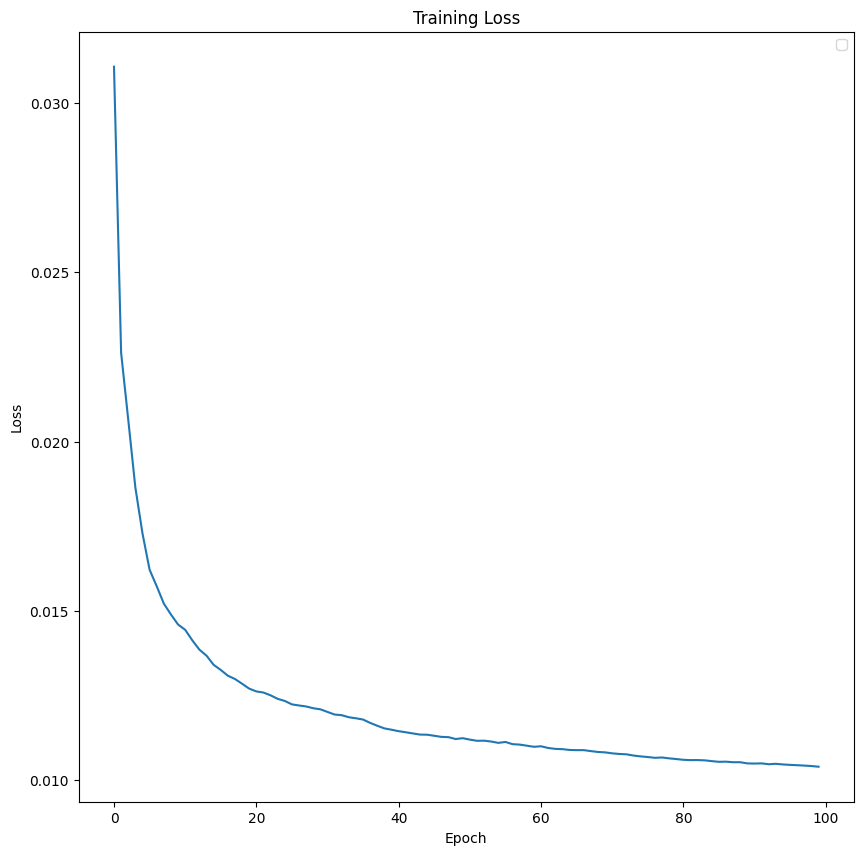

In [13]:
pyplot.figure(figsize=(10, 10))
pyplot.plot(arange(0, 100), h.history["loss"])
pyplot.title("Training Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()

In [14]:
encoder = Model(input_img, encoded)

In [15]:
encoded_input = Input(shape=(encoding_dim,))
decoder_l1 = autoencoder.layers[-4]
decoder_l2 = autoencoder.layers[-3]
decoder_l3 = autoencoder.layers[-2]
decoder_l4 = autoencoder.layers[-1]
# as if I am multiplying the last layer with the code layer to get the last output
decoder = Model(
    encoded_input, decoder_l4(decoder_l3(decoder_l2(decoder_l1(encoded_input))))
)

In [16]:
encoded_images = encoder.predict(x_test_flattened)
decoded_images = decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


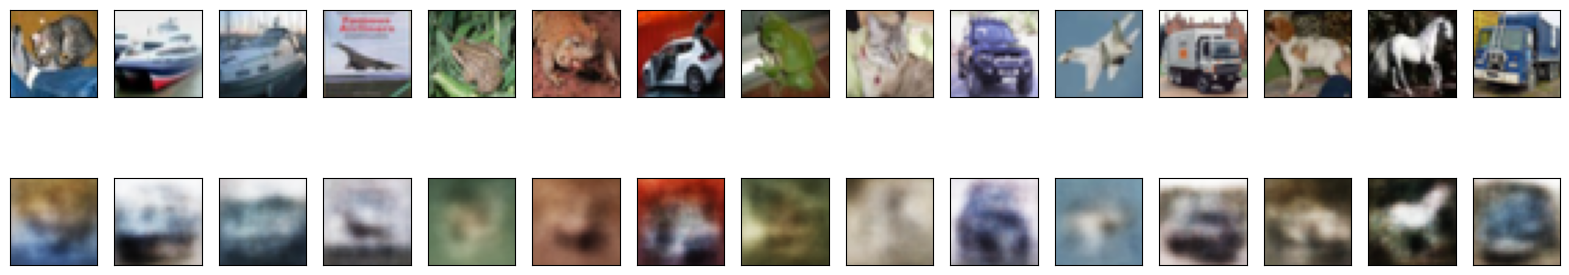

In [17]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_images[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

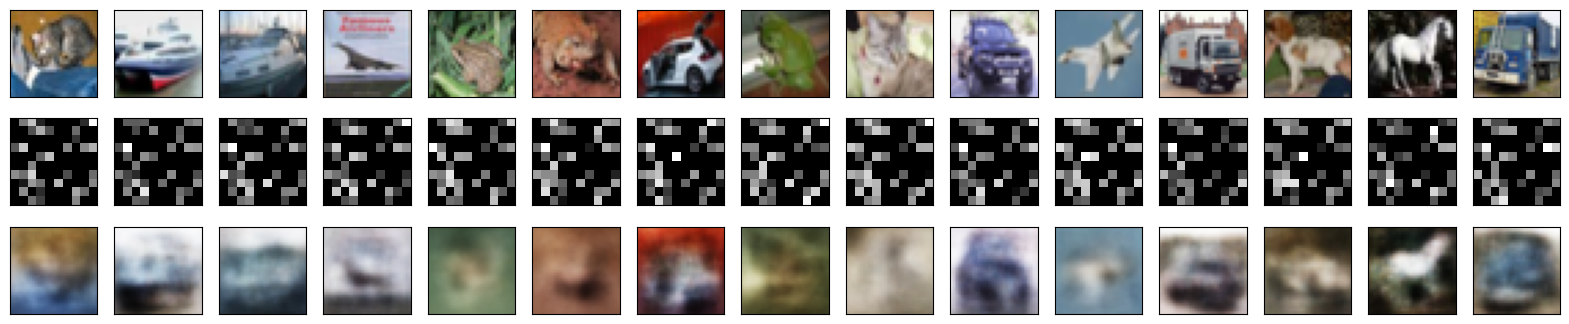

In [18]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [19]:
def add_gaussian_noise(images: ndarray, mean: float, std_dev: float) -> ndarray:
    noise = random.normal(mean, std_dev, size=images.shape)
    return clip(images + noise, 0.0, 1.0)

In [20]:
mean = 0
sigma = 0.1

In [21]:
x_train_noisy = add_gaussian_noise(x_train, mean, sigma)
x_test_noisy = add_gaussian_noise(x_test, mean, sigma)

In [22]:
x_train_noisy.shape, x_test_noisy.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [23]:
x_train_noisy_flattened = x_train_noisy.reshape(
    (len(x_train_noisy), prod(x_train_noisy.shape[1:]))
)
x_test_noisy_flattened = x_test_noisy.reshape(
    (len(x_test_noisy), prod(x_test_noisy.shape[1:]))
)

In [24]:
backend.clear_session()

### After Adding Noise

In [25]:
autoencoder.compile(optimizer="adam", loss="mse")

In [26]:
h = autoencoder.fit(
    x_train_noisy_flattened, x_train_flattened, epochs=100, batch_size=64
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0120
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 10/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 11/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 12/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 13/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 14/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 15/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3

In [27]:
encoded_images_noisy = encoder.predict(x_test_noisy_flattened)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


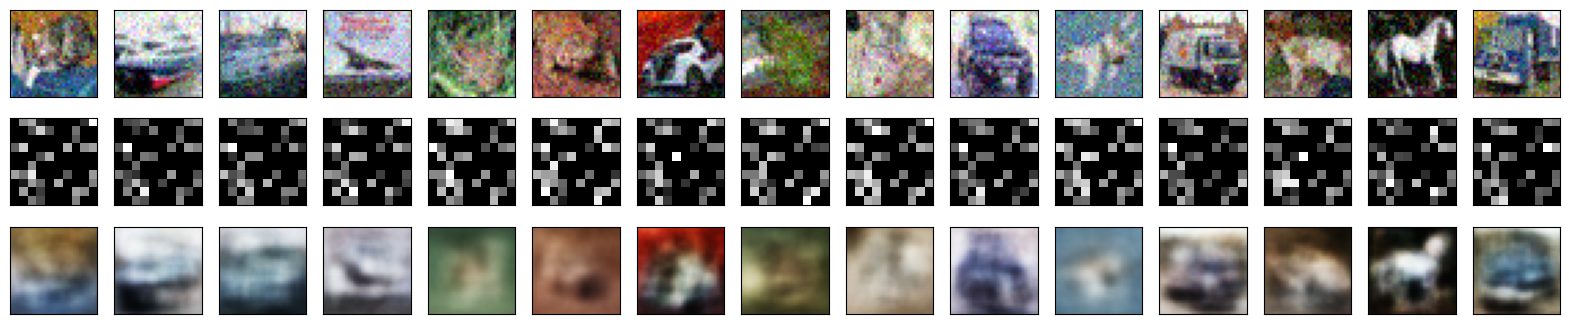

In [28]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images_noisy[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [29]:
def add_noise_to_code(encoded: ndarray, mean: float, std_dev: float) -> ndarray:
    noise = backend.random_normal(
        shape=backend.shape(encoded), mean=mean, stddev=std_dev
    )
    return encoded + noise

In [30]:
encoded_images = encoder.predict(x_test_flattened)
encoded_images_noisy = add_noise_to_code(encoded_images_noisy, mean, sigma)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
encoded_images_noisy = array(encoded_images_noisy)

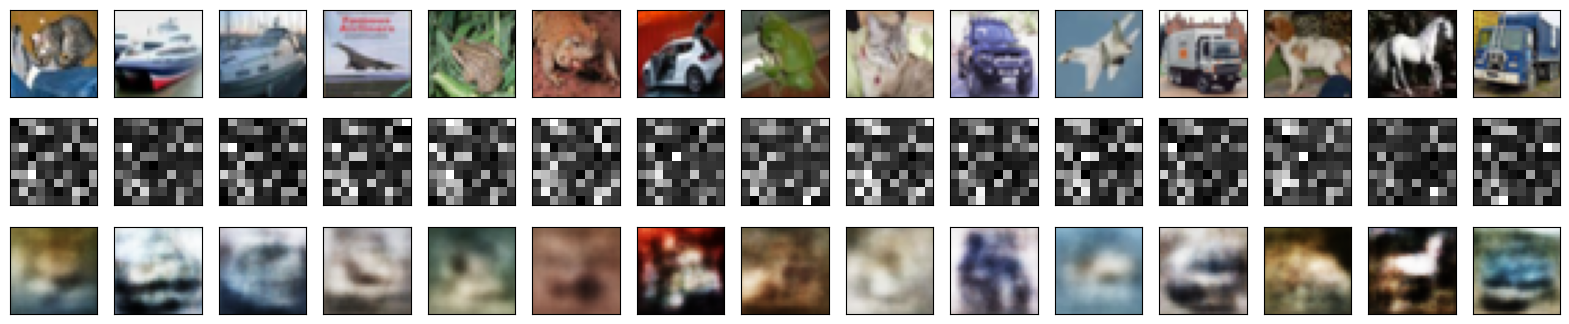

In [32]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images_noisy[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

## Create CNN Autoencoder Model

In [33]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)

In [34]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [35]:
h = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.5857
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5587
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5575
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5563
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5558
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5550
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5538
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5537
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5538
Epoch 10/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5529
Epoch 11/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5521
Epoch 12/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5528
Epoch 13/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5524
Epoch 14/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5520
Epoch 15/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 

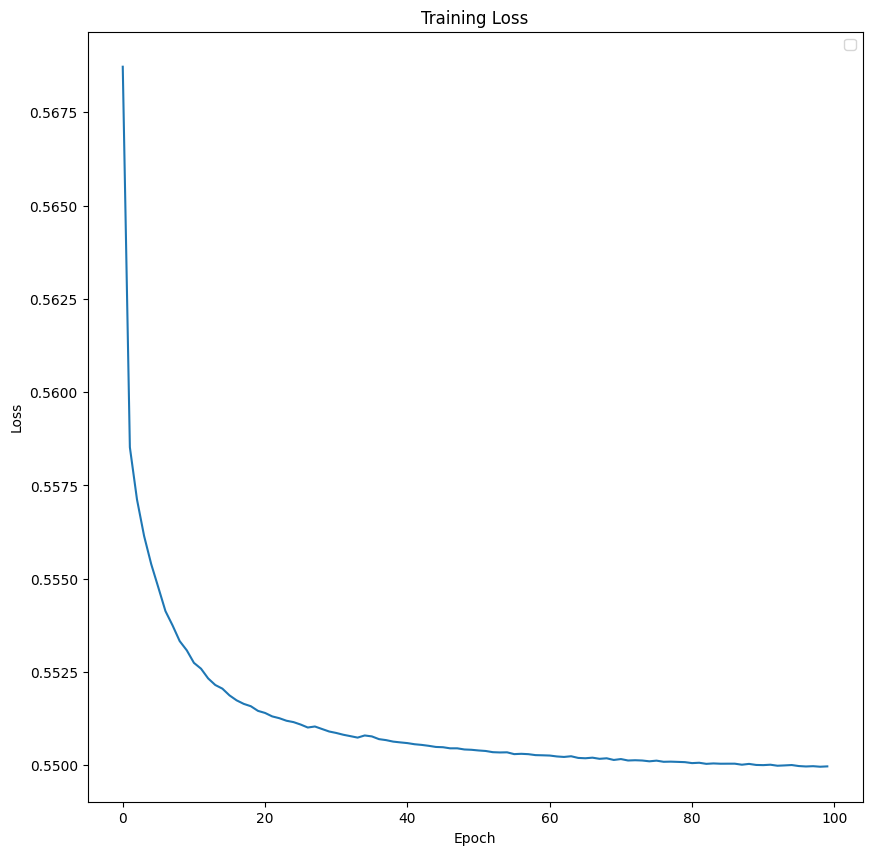

In [36]:
pyplot.figure(figsize=(10, 10))
pyplot.plot(arange(0, 100), h.history["loss"])
pyplot.title("Training Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()